In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [3]:
df = pd.read_csv('./datafiles/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
df.iloc[:, 12]

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [28]:
# binary classification, muliti classification 두 가지 방식으로 nural network model을 만들고 
# train data로 학습시킨 후 test data로 accuracy를 평가하시오

In [6]:
y = df.iloc[:, 12].values
x = df.iloc[:, :12].values

In [7]:
y_oh = tf.keras.utils.to_categorical(y)

In [8]:
# binary

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [10]:
x.shape

(6497, 12)

In [11]:
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                468       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
x_train.shape

(4872, 12)

In [14]:
y_train.shape

(4872,)

In [15]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [16]:
model.fit(x_train.astype(float), y_train, epochs=50, batch_size=20)

Epoch 1/50
244/244 [==============================] - 1s 788us/step - loss: 2.3508 - accuracy: 0.7225
Epoch 2/50
244/244 [==============================] - 0s 767us/step - loss: 0.5115 - accuracy: 0.9296
Epoch 3/50
244/244 [==============================] - 0s 772us/step - loss: 0.4545 - accuracy: 0.9349
Epoch 4/50
244/244 [==============================] - 0s 788us/step - loss: 0.4081 - accuracy: 0.9345
Epoch 5/50
244/244 [==============================] - 0s 727us/step - loss: 0.3709 - accuracy: 0.9368
Epoch 6/50
244/244 [==============================] - 0s 669us/step - loss: 0.3353 - accuracy: 0.9390
Epoch 7/50
244/244 [==============================] - 0s 698us/step - loss: 0.3085 - accuracy: 0.9409
Epoch 8/50
244/244 [==============================] - 0s 722us/step - loss: 0.2845 - accuracy: 0.9405
Epoch 9/50
244/244 [==============================] - 0s 694us/step - loss: 0.2643 - accuracy: 0.9423
Epoch 10/50
244/244 [==============================] - 0s 698us/step - loss: 0.246

In [17]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 598us/step - loss: 0.0454 - accuracy: 0.9877


[0.04544844105839729, 0.9876922965049744]

In [ ]:
# multiclassification

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)

In [19]:
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                468       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 2)                 20        
                                                                 
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [21]:
model.fit(x_train.astype(float), y_train, epochs=50, batch_size=20)

Epoch 1/50
244/244 [==============================] - 0s 759us/step - loss: 3.4657 - accuracy: 0.7406
Epoch 2/50
244/244 [==============================] - 0s 764us/step - loss: 0.4476 - accuracy: 0.9257
Epoch 3/50
244/244 [==============================] - 0s 739us/step - loss: 0.3623 - accuracy: 0.9378
Epoch 4/50
244/244 [==============================] - 0s 731us/step - loss: 0.3077 - accuracy: 0.9399
Epoch 5/50
244/244 [==============================] - 0s 735us/step - loss: 0.2716 - accuracy: 0.9411
Epoch 6/50
244/244 [==============================] - 0s 735us/step - loss: 0.2430 - accuracy: 0.9415
Epoch 7/50
244/244 [==============================] - 0s 731us/step - loss: 0.2181 - accuracy: 0.9466
Epoch 8/50
244/244 [==============================] - 0s 731us/step - loss: 0.1976 - accuracy: 0.9487
Epoch 9/50
244/244 [==============================] - 0s 739us/step - loss: 0.1778 - accuracy: 0.9546
Epoch 10/50
244/244 [==============================] - 0s 730us/step - loss: 0.147

In [22]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 579us/step - loss: 0.0541 - accuracy: 0.9815


[0.05414465814828873, 0.9815384745597839]

In [23]:
model.save('./deep_model/wine_model.h5')

In [52]:
# model checkpointer

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
import os

In [26]:
model_dir = './deep_model/model_check'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [28]:
modelpath = './deep_model/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
# 더 나은 모델이 나오면 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, \
                               save_best_only=True)

In [29]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=100, \
                    callbacks=[checkpointer])

Epoch 1/100
65/78 [========================>.....] - ETA: 0s - loss: 0.7141 - accuracy: 0.7840 
Epoch 1: val_loss improved from inf to 0.29992, saving model to ./deep_model/model_check\01-0.299920.hdf5
78/78 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.7996 - val_loss: 0.2999 - val_accuracy: 0.8790
Epoch 2/100
70/78 [=========================>....] - ETA: 0s - loss: 0.2652 - accuracy: 0.9123
Epoch 2: val_loss improved from 0.29992 to 0.25949, saving model to ./deep_model/model_check\02-0.259490.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.2621 - accuracy: 0.9145 - val_loss: 0.2595 - val_accuracy: 0.9159
Epoch 3/100
68/78 [=========================>....] - ETA: 0s - loss: 0.2350 - accuracy: 0.9276
Epoch 3: val_loss improved from 0.25949 to 0.22630, saving model to ./deep_model/model_check\03-0.226301.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.9261 - val_loss: 0.2263 - val_accuracy: 0.9313
E

Epoch 27/100
68/78 [=========================>....] - ETA: 0s - loss: 0.0894 - accuracy: 0.9741
Epoch 27: val_loss improved from 0.07683 to 0.07354, saving model to ./deep_model/model_check\27-0.073542.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9736 - val_loss: 0.0735 - val_accuracy: 0.9733
Epoch 28/100
68/78 [=========================>....] - ETA: 0s - loss: 0.0789 - accuracy: 0.9756
Epoch 28: val_loss did not improve from 0.07354
78/78 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9728 - val_loss: 0.1243 - val_accuracy: 0.9559
Epoch 29/100
70/78 [=========================>....] - ETA: 0s - loss: 0.0863 - accuracy: 0.9746
Epoch 29: val_loss did not improve from 0.07354
78/78 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9754 - val_loss: 0.1128 - val_accuracy: 0.9590
Epoch 30/100
71/78 [==========================>...] - ETA: 0s - loss: 0.0811 - accuracy: 0.9752
Epoch 30: val_loss imp

68/78 [=========================>....] - ETA: 0s - loss: 0.0637 - accuracy: 0.9809
Epoch 55: val_loss improved from 0.05575 to 0.05390, saving model to ./deep_model/model_check\55-0.053902.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9805 - val_loss: 0.0539 - val_accuracy: 0.9774
Epoch 56/100
67/78 [========================>.....] - ETA: 0s - loss: 0.0683 - accuracy: 0.9797
Epoch 56: val_loss did not improve from 0.05390
78/78 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.0563 - val_accuracy: 0.9795
Epoch 57/100
69/78 [=========================>....] - ETA: 0s - loss: 0.0682 - accuracy: 0.9800
Epoch 57: val_loss did not improve from 0.05390
78/78 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9805 - val_loss: 0.0540 - val_accuracy: 0.9744
Epoch 58/100
68/78 [=========================>....] - ETA: 0s - loss: 0.0594 - accuracy: 0.9821
Epoch 58: val_loss did not improve 

Epoch 84/100
69/78 [=========================>....] - ETA: 0s - loss: 0.0630 - accuracy: 0.9806
Epoch 84: val_loss did not improve from 0.04649
78/78 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9810 - val_loss: 0.0592 - val_accuracy: 0.9785
Epoch 85/100
68/78 [=========================>....] - ETA: 0s - loss: 0.0561 - accuracy: 0.9850
Epoch 85: val_loss did not improve from 0.04649
78/78 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9849 - val_loss: 0.0514 - val_accuracy: 0.9774
Epoch 86/100
69/78 [=========================>....] - ETA: 0s - loss: 0.0568 - accuracy: 0.9838
Epoch 86: val_loss improved from 0.04649 to 0.04410, saving model to ./deep_model/model_check\86-0.044098.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9846 - val_loss: 0.0441 - val_accuracy: 0.9815
Epoch 87/100
68/78 [=========================>....] - ETA: 0s - loss: 0.0573 - accuracy: 0.9838
Epoch 87: val_loss did

In [30]:
history.history

{'loss': [0.6462540626525879,
  0.262124627828598,
  0.23303040862083435,
  0.20047500729560852,
  0.1817811131477356,
  0.17684201896190643,
  0.16861757636070251,
  0.16048163175582886,
  0.1575106829404831,
  0.15051862597465515,
  0.13658343255519867,
  0.12978218495845795,
  0.11715156584978104,
  0.11615592241287231,
  0.10450859367847443,
  0.10221270471811295,
  0.10681454092264175,
  0.09788275510072708,
  0.09588993340730667,
  0.09067145735025406,
  0.09602274745702744,
  0.11179004609584808,
  0.1080062985420227,
  0.0862417072057724,
  0.08252063393592834,
  0.08146845549345016,
  0.0885937437415123,
  0.08699624240398407,
  0.08230717480182648,
  0.08139397203922272,
  0.07877377420663834,
  0.08949358761310577,
  0.08140144497156143,
  0.08129256218671799,
  0.07459380477666855,
  0.07822424173355103,
  0.07721816003322601,
  0.09747952222824097,
  0.07341262698173523,
  0.08669786900281906,
  0.08423647284507751,
  0.07225419580936432,
  0.07029872387647629,
  0.0732482

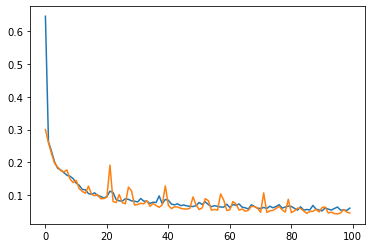

In [31]:
# val_loss가 더 크면 과적합
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

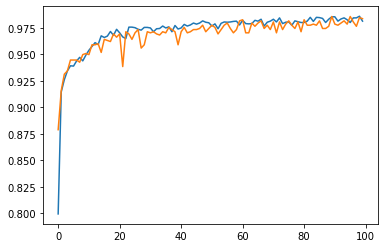

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [73]:
# early stopping

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
# Early stopping 은 무조건 Epoch 을 많이 돌린 후, 특정 시점에서 멈추는 것이다. 
# 너무 많은 Epoch 은 overfitting 을 일으킨다. 하지만 너무 적은 Epoch 은 underfitting 을 일으킨다. 

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=7)

In [36]:
modelpath = './deep_model/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, \
                               save_best_only=True)

In [37]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=200, \
                    callbacks=[checkpointer, early_stopping_callback])

Epoch 1/200
67/78 [========================>.....] - ETA: 0s - loss: 0.2266 - accuracy: 0.9272 
Epoch 1: val_loss improved from inf to 0.17749, saving model to ./deep_model/model_check\01-0.177491.hdf5
78/78 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9276 - val_loss: 0.1775 - val_accuracy: 0.9405
Epoch 2/200
66/78 [========================>.....] - ETA: 0s - loss: 0.1993 - accuracy: 0.9327
Epoch 2: val_loss improved from 0.17749 to 0.16138, saving model to ./deep_model/model_check\02-0.161377.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9348 - val_loss: 0.1614 - val_accuracy: 0.9405
Epoch 3/200
68/78 [=========================>....] - ETA: 0s - loss: 0.1777 - accuracy: 0.9397
Epoch 3: val_loss did not improve from 0.16138
78/78 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.9387 - val_loss: 0.1708 - val_accuracy: 0.9405
Epoch 4/200
68/78 [=========================>....] - ETA: 0s - l

78/78 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9751 - val_loss: 0.0456 - val_accuracy: 0.9826
Epoch 28/200
67/78 [========================>.....] - ETA: 0s - loss: 0.0667 - accuracy: 0.9812
Epoch 28: val_loss did not improve from 0.04565
78/78 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.9802 - val_loss: 0.1118 - val_accuracy: 0.9590
Epoch 29/200
70/78 [=========================>....] - ETA: 0s - loss: 0.0755 - accuracy: 0.9771
Epoch 29: val_loss did not improve from 0.04565
78/78 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9769 - val_loss: 0.0716 - val_accuracy: 0.9713
Epoch 30/200
69/78 [=========================>....] - ETA: 0s - loss: 0.0693 - accuracy: 0.9786
Epoch 30: val_loss did not improve from 0.04565
78/78 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0466 - val_accuracy: 0.9836
Epoch 31/200
70/78 [=========================>....] 

Epoch 56/200
69/78 [=========================>....] - ETA: 0s - loss: 0.0544 - accuracy: 0.9832
Epoch 56: val_loss did not improve from 0.03255
78/78 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0430 - val_accuracy: 0.9826
Epoch 57/200
70/78 [=========================>....] - ETA: 0s - loss: 0.0539 - accuracy: 0.9860
Epoch 57: val_loss did not improve from 0.03255
78/78 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9856 - val_loss: 0.0471 - val_accuracy: 0.9805
Epoch 58/200
69/78 [=========================>....] - ETA: 0s - loss: 0.0639 - accuracy: 0.9794
Epoch 58: val_loss did not improve from 0.03255
78/78 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9795 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 59/200
67/78 [========================>.....] - ETA: 0s - loss: 0.0574 - accuracy: 0.9833
Epoch 59: val_loss did not improve from 0.03255
78/78 [==============================

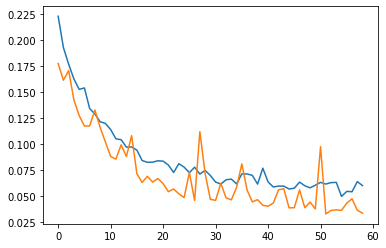

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

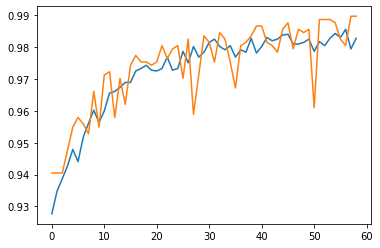

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [41]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 578us/step - loss: 0.0615 - accuracy: 0.9846


[0.061482273042201996, 0.9846153855323792]